In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [9]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",  delimiter=',', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df = df[["v1", "v2"]]
df.columns = ["labels", "messages"]
df.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isna().sum()

labels      0
messages    0
dtype: int64

In [13]:
df["labels"].value_counts()

labels
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='labels'>

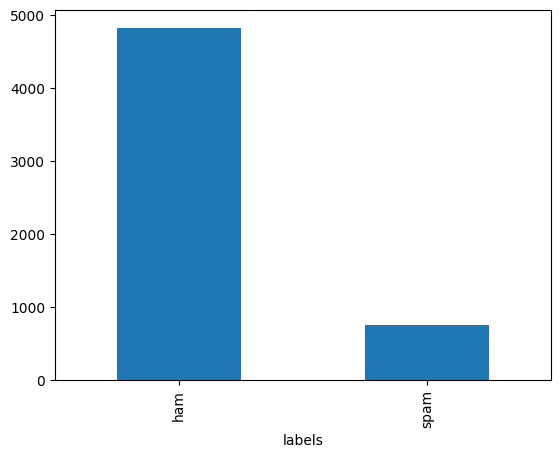

In [16]:
df["labels"].value_counts().plot(kind="bar")

In [17]:
df["label_num"] = df["labels"].map({"ham":0, "spam":1})
df.head(
    
)

,labels,messages,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [19]:
df.shape

(5572, 3)

In [18]:
df.duplicated().sum()

403

In [24]:
tfid = TfidfVectorizer()

import string
import nltk

def clean_message(message):
    message = re.sub(r'@\S+', '', message.lower())
    message = re.sub(r'http\S+', '', message) 
    message = re.sub(r'pic.\S+', '', message)
    message = re.sub(r"[^a-zA-Z+']", ' ', message)  
    message = re.sub(r'\s+[a-zA-Z]\s+', ' ', message + ' ')
    stopwords = nltk.corpus.stopwords.words('english')  
    message = "".join([w for w in message if w not in string.punctuation ])
    words = nltk.word_tokenize(message)
    message = " ".join([w for w in words if w not in stopwords ])

    return message

In [26]:
df["message_cleaned"] = df["messages"].apply(clean_message) 

In [27]:
df.head()

,labels,messages,label_num,message_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis great wo...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goes usf lives around though


In [51]:
tfid.fit_transform(df["message_cleaned"]).toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
x = tfid.fit_transform(df["message_cleaned"]).toarray()
y = df["label_num"].values

x.shape, y.shape

((5572, 7585), (5572,))

In [29]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=12)

In [30]:
from sklearn.svm import SVC

svc = SVC()

In [31]:
svc.fit(x_train, y_train)

SVC()

In [33]:
print("model score: ",svc.score(x_train, y_train))

model score:  0.9982050706753421


In [41]:
print("Accuracy score of SVC model: ", accuracy_score(y_test,svc.predict(x_test)))

Accuracy score of SVC model:  0.9659192825112107


In [34]:
# Train a naive bayes model
NB_model = MultinomialNB()
NB_model.fit(x_train, y_train)

MultinomialNB()

In [35]:
print("model score :", NB_model.score(x_train, y_train))

model score : 0.9786852142696881


In [38]:
print("Accuracy score of MultinomialNB model: ", accuracy_score(y_test,NB_model.predict(x_test) ))

Accuracy score of MultinomialNB model:  0.9605381165919282
